<a href="https://colab.research.google.com/github/Mairarully/flowerclassification-cnn-resnet50/blob/main/Salinan_dari_CNN_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip flowers.zip

Archive:  flowers.zip
   creating: flowers/
   creating: flowers/bougainvillea/
  inflating: flowers/bougainvillea/bougainvillea_00002.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00003.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00004.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00006.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00007.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00008.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00014.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00016.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00017.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00018.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00019.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00020.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00023.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00024.jpg  
  inflating: flowers/bougainvillea/bougainvillea_00025.jpg  
  inf

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support
import seaborn as sns

In [3]:
base_dir = '/content/flowers'

In [4]:
img_height, img_width = 150, 150
batch_size = 32
seed = 42

augmentasi dan normalisasi

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40, # Increased rotation range
    width_shift_range=0.25, # Increased width shift range
    height_shift_range=0.25, # Increased height shift range
    shear_range=0.2, # Added shear augmentation
    zoom_range=0.25, # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest' # Added fill_mode to handle new pixels created by augmentation
)

train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=seed
)

val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=seed
)

Found 409 images belonging to 10 classes.
Found 96 images belonging to 10 classes.


cnn model

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support

# Get class names from the training data generator
class_names = list(train_data.class_indices.keys())
print(f"Class Names: {class_names}")
print(f"Number of Classes: {len(class_names)}")


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

Class Names: ['bougainvillea', 'daisies', 'garden_roses', 'gardinias', 'hibiscus', 'hydrangeas', 'lilies', 'orchids', 'peonies', 'tulip']
Number of Classes: 10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


optimizer

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,566,026 (36.49 MB)

 Trainable params: 9,566,026 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

training

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=60
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0927 - loss: 2.6034

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.0950 - loss: 2.5922 - val_accuracy: 0.1562 - val_loss: 2.2246
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.1376 - loss: 2.2464 - val_accuracy: 0.2500 - val_loss: 2.0093
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2367 - loss: 2.0399 - val_accuracy: 0.3125 - val_loss: 1.8699
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.2262 - loss: 1.9953 - val_accuracy: 0.2917 - val_loss: 1.8458
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2412 - loss: 1.9404 - val_accuracy: 0.3438 - val_loss: 1.8315
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2769 - loss: 1.9389 - val_accuracy: 0.4062 - val_loss: 1.7631
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3238 - loss: 1.8041 - val_accuracy: 0.4479 - val_loss: 1.6897
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3479 - loss: 1.7895 - val_accuracy: 0.4375 - val_loss: 1.7122
Epo

accuracy dan loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6797 - loss: 1.1605
Akurasi: 0.69
Loss: 1.16


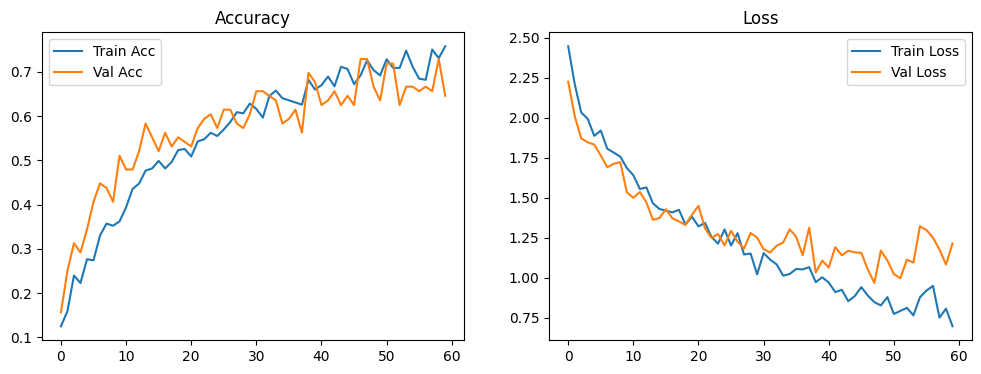

In [9]:
loss, accuracy = model.evaluate(val_data)
print(f"Akurasi: {accuracy:.2f}")
print(f"Loss: {loss:.2f}")

# Plot learning curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

confusion matrix, precision, recall, f1-score

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


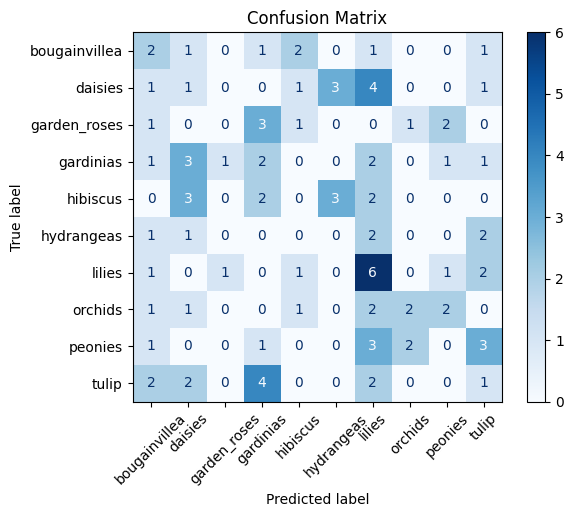


Classification Report:
               precision    recall  f1-score   support

bougainvillea       0.18      0.25      0.21         8
      daisies       0.08      0.09      0.09        11
 garden_roses       0.00      0.00      0.00         8
    gardinias       0.15      0.18      0.17        11
     hibiscus       0.00      0.00      0.00        10
   hydrangeas       0.00      0.00      0.00         6
       lilies       0.25      0.50      0.33        12
      orchids       0.40      0.22      0.29         9
      peonies       0.00      0.00      0.00        10
        tulip       0.09      0.09      0.09        11

     accuracy                           0.15        96
    macro avg       0.12      0.13      0.12        96
 weighted avg       0.12      0.15      0.13        96


Precision (Macro Avg): 0.12
Recall (Macro Avg): 0.13
F1 Score (Macro Avg): 0.12

Learning Curves:


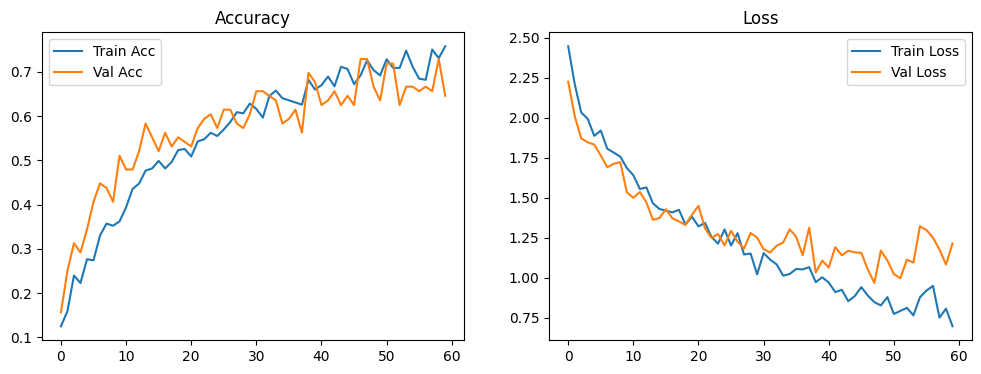

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support
from tensorflow.keras.preprocessing import image

# Make predictions using the trained model on val_data
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_data.classes # y_true is already defined from previous steps and is the same

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Precision, Recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
print(f"\nPrecision (Macro Avg): {precision:.2f}")
print(f"Recall (Macro Avg): {recall:.2f}")
print(f"F1 Score (Macro Avg): {f1:.2f}")

# Plot learning curves
print("\nLearning Curves:")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

Saving tulip_00022.jpg to tulip_00022.jpg


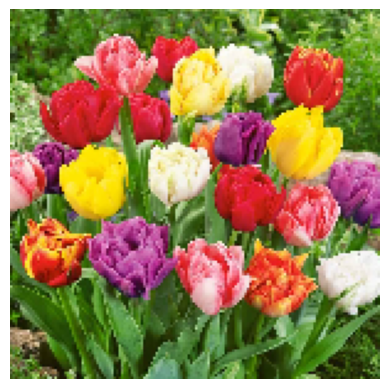

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Prediksi: lilies (55.34%)


In [12]:
from tensorflow.keras.preprocessing import image

# Upload gambar
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"Prediksi: {predicted_class} ({confidence * 100:.2f}%)")

In [13]:
img_height = 150  # Or the appropriate height used during training
img_width = 150   # Or the appropriate width used during training

In [14]:
!pip install gradio

In [15]:
from tensorflow.keras.preprocessing import image

def classify_image(img):
    """
    Classifies an input image using the trained model.

    Args:
        img: Input image (PIL Image object).

    Returns:
        A tuple containing the predicted class name and confidence score.
    """
    # Preprocess the image
    img = img.resize((img_width, img_height))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)

    # Get predicted class and confidence
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    confidence = np.max(prediction)

    return predicted_class, float(confidence)

In [ ]:
import gradio as gr

iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Label(), gr.Number(label="Confidence")],
    title="Flower Image Classifier",
    description="Upload an image of a flower and the model will predict its class."
)

iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bd4bd5c36d1214c802.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Created dataset file at: .gradio/flagged/dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
